In [2]:
#Эксперименты 
import numpy as np
import scipy.io.wavfile
from scipy.io import wavfile
import math
import matplotlib.pyplot as plt
import wave
import random 
import math
import pandas as pd

a = np.random.random(30000)
b = np.random.random(30000)
#Убрал потому что если в scipy.io.wavfile.write подаешь float32 то значения должны быть от -1 до 1
#a = [int (i * 2000) for i in a] 
b = [int (i * 3700) for i in b]
a = np.asarray(a, dtype=np.float32)
b = np.asarray(b, dtype=np.float16)
c = np.concatenate((a,b), axis=0)
d = np.array([a,b]).T
rate = 16000
#scipy.io.wavfile.write('lol.wav',rate, a) #Тут получается хороший такой шум


# TXT to csv

In [23]:
#надо допилить
#text_file = open('lbm_out_data_MY/0.txt')
#lines = text_file.readlines()

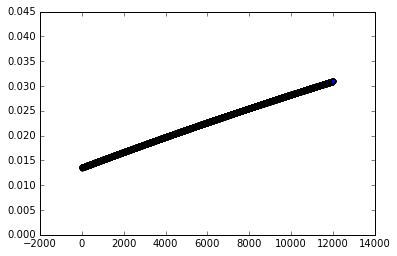

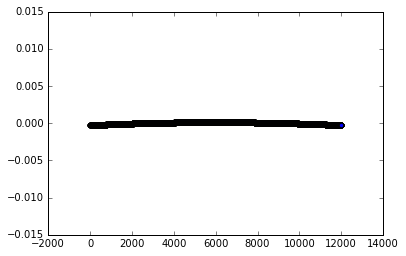

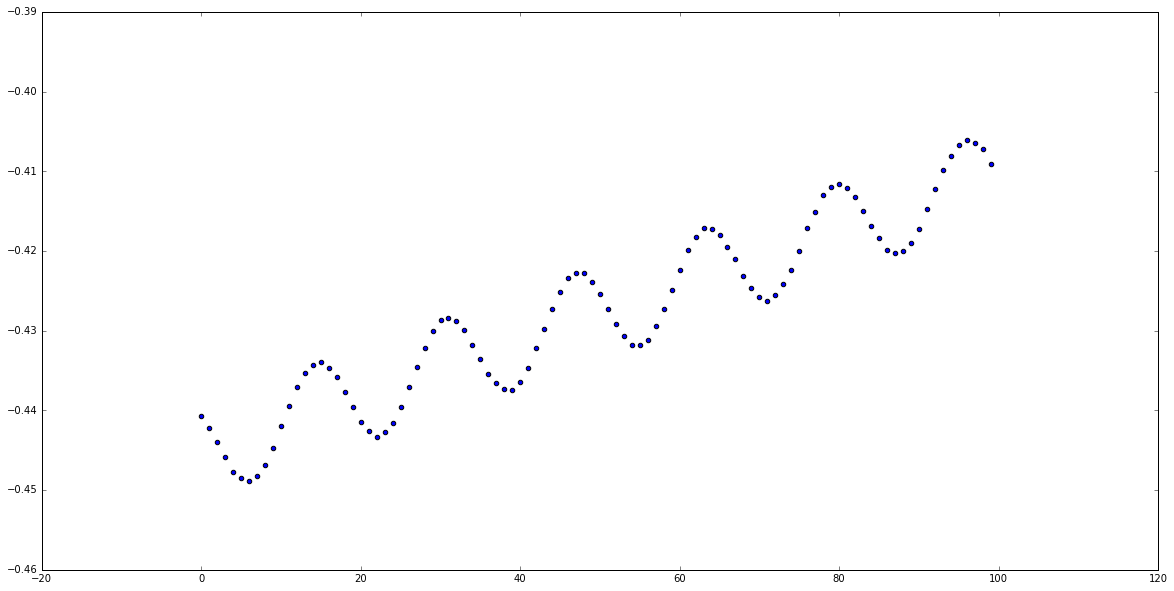

In [10]:
#мои данные
%matplotlib inline
df = pd.read_csv('lbm_out_data_MY/0.csv', header =None)
arr = np.array(df.iloc[1], dtype=np.float32)
arr = arr[1:]
arr -= 1
plt.figure(1)
#plt.scatter(range(100), arr[3000:3100])
plt.scatter(range(len(arr)), arr)

coefficients = np.polyfit(range(len(arr)), arr, 1 ) #where 1 is the degree of freedom
p = np.poly1d( coefficients ) 
for i in range(len(arr)):
    arr[i] -= p(i)
plt.figure(2)
plt.scatter(range(len(arr)), arr)

arr /= np.linalg.norm(arr)
arr *= 40
plt.figure(3)
#plt.scatter(range(100), arr[3000:3100])
fig = plt.figure(figsize= (20, 10))
plt.scatter(range(100), arr[1000:1100])
#plt.savefig('small_tromb.png')

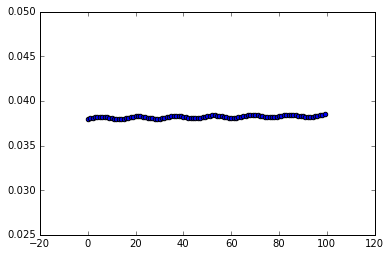

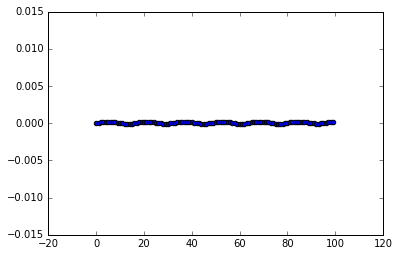

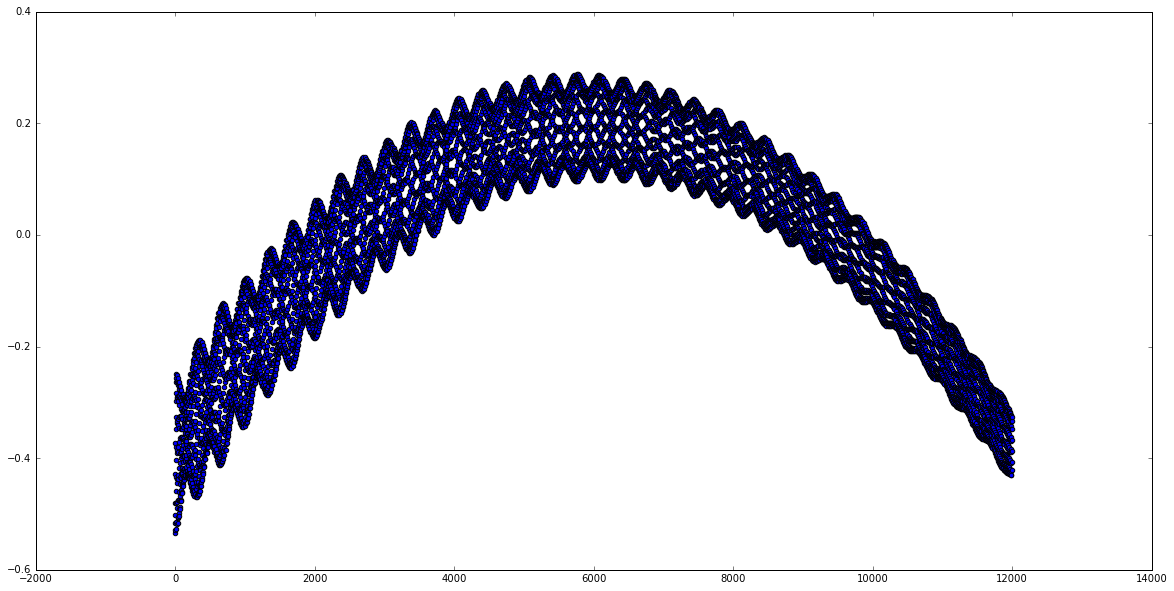

In [8]:
df = pd.read_csv('lbm_out_data_MY/7.csv', header =None)
arr = np.array(df.iloc[1], dtype=np.float32)
arr = arr[1:]
arr -= 1
plt.figure(1)
plt.scatter(range(100), arr[3000:3100])

coefficients = np.polyfit(range(len(arr)), arr, 1 ) #where 1 is the degree of freedom
p = np.poly1d( coefficients ) 
for i in range(len(arr)):
    arr[i] -= p(i)
plt.figure(2)
plt.scatter(range(100), arr[3000:3100])

arr /= np.linalg.norm(arr)
arr *= 20
plt.figure(3)
#plt.scatter(range(100), arr[3000:3100])
fig = plt.figure(figsize= (20, 10))
plt.scatter(range(len(arr)), arr)
plt.savefig('big_tromb.png')

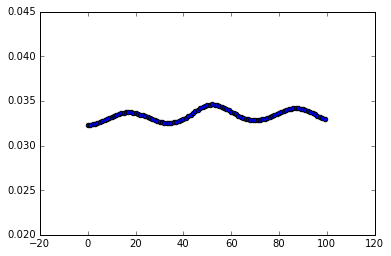

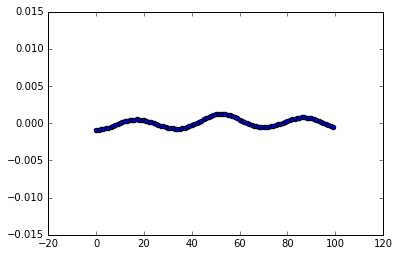

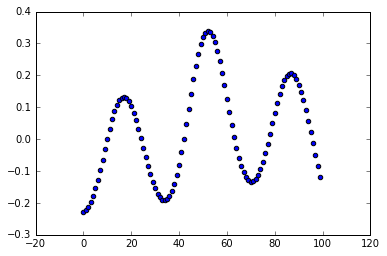

In [12]:
df = pd.read_csv('lbm_out_data/lbm_test_data.csv', header =None)
arr = np.array(df.iloc[1], dtype=np.float32)
arr = arr[1:]
arr -= 1
plt.figure(1)
plt.scatter(range(100), arr[3000:3100])

coefficients = np.polyfit(range(len(arr)), arr, 1 ) #where 1 is the degree of freedom
p = np.poly1d( coefficients ) 
for i in range(len(arr)):
    arr[i] -= p(i)
plt.figure(2)
plt.scatter(range(100), arr[3000:3100])

arr /= np.linalg.norm(arr)
arr *= 20
plt.figure(3)
plt.scatter(range(100), arr[3000:3100])

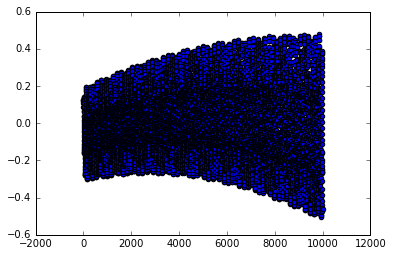

In [13]:
#Рисование массива который пихаем в wav
%matplotlib inline
plt.scatter(range(len(arr)), arr)
#plt.scatter(range(100), arr[3000:3100])
#plt.plot(range(len(arr)), p(range(len(arr))))
#plt.savefig('gr.png')

In [80]:
df = pd.read_csv('lbm_out_data/lbm_test_data.csv', header =None)

arr = np.array(df.iloc[8], dtype=np.float32) #точку любую можно строить не только 8
arr1 = np.array(df1.iloc[1], dtype=np.float32)

arr = arr[1:]
#чтобы удлинить массив берем из другого файла еще одну точку
#arr = np.concatenate((arr,arr1))

arr -= 1
coefficients = np.polyfit(range(len(arr)), arr, 1 ) #where 1 is the degree of freedom
p = np.poly1d( coefficients ) 
for i in range(len(arr)):
    arr[i] -= p(i)
#print(np.linalg.norm(arr))

arr /= np.linalg.norm(arr) #Входные в wav значения в формате float32 должны быть от -1 до 1
arr = np.asarray(arr, dtype=np.float32)
arr *= 30
rate = 7000
scipy.io.wavfile.write('lol.wav',rate,arr)

In [59]:
arr *= 20
rate = 7000
scipy.io.wavfile.write('lol.wav',rate,arr)

# Дальше просто разные способы визуализации 

In [ ]:
# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('lol.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
#plt.figure(figsize=(range(len(times)), 4))
plt.plot(times, data, color='k') 
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
#plt.savefig('plot.png', dpi=100)
plt.show()

data

In [ ]:
#Это просто из инета для визуалтзации 2-х каналов
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}

def format_time(x, pos=None):
    global duration, nframes, k
    progress = int(x / float(nframes) * duration * k)
    mins, secs = divmod(progress, 60)
    hours, mins = divmod(mins, 60)
    out = "%d:%02d" % (mins, secs)
    if hours > 0:
        out = "%d:" % hours
    return out

def format_db(x, pos=None):
    if pos == 0:
        return ""
    global peak
    if x == 0:
        return "-inf"

    db = 20 * math.log10(abs(x) / float(peak))
    return int(db)

wav = wave.open("lol.wav", mode="r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()

duration = nframes / framerate
w, h = 800, 300
k = nframes/w/32
DPI = 72
peak = 256 ** sampwidth / 2

content = wav.readframes(nframes)
samples = np.fromstring(content, dtype=types[sampwidth])

plt.figure(1, figsize=(float(w)/DPI, float(h)/DPI), dpi=DPI)
plt.subplots_adjust(wspace=0, hspace=0)

for n in range(nchannels):
    channel = samples[n::nchannels]

    channel = channel[::int(k)]
    if nchannels == 1:
        channel = channel - peak

    axes = plt.subplot(2, 1, n+1, axisbg="k")
    axes.plot(channel, "g")
    axes.yaxis.set_major_formatter(ticker.FuncFormatter(format_db))
    plt.grid(True, color="w")
    axes.xaxis.set_major_formatter(ticker.NullFormatter())

axes.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
plt.savefig("wave", dpi=DPI)
plt.show()